In [1]:
!pip install py-tgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34457 sha256=3a67999f993df2cbb3e50d3c967fda303943d408b1477d8f16ddbc33cf6d9c2c
  Stored in directory: /root/.cache/pip/wheels/60/bd/a0/c20dd085251d95af656b5e3d287db7d4b4e8aec67b53a6f8dd
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3318 sha256=e1005f37c50f55f6cdd60b66228afdf04d8bc6353f9e43025fab6a1d445863ac
  Stored in directory: /root/.cache/pip/wheels/18/d7/bc/7b88d8405d97070a1a62712fd639ea0ad8d14b3dd74075cca6
Successfully built clint args


In [2]:
!git clone https://github.com/shenyangHuang/TGB.git

Cloning into 'TGB'...
remote: Enumerating objects: 2720, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 2720 (delta 121), reused 167 (delta 107), pack-reused 2445
Receiving objects: 100% (2720/2720), 5.39 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (1557/1557), done.


In [3]:
from tgb.linkproppred.dataset_pyg import PyGLinkPropPredDataset


In [4]:
name = "tgbl-wiki"
dataset = PyGLinkPropPredDataset(name=name, root="datasets")

Dataset tgbl-wiki version 2 not found.
Please download the latest version of the dataset.
Will you download the dataset(s) now? (y/N)
y
Download started, this might take a while . . . 
Dataset title: tgbl-wiki
Download completed 
Dataset directory is  /usr/local/lib/python3.10/dist-packages/tgb/datasets/tgbl_wiki
file not processed, generating processed file


Tgbl-wiki()

In [5]:
data = dataset.get_TemporalData()

In [6]:
data

TemporalData(src=[157474], dst=[157474], t=[157474], msg=[157474, 172], y=[157474])

In [7]:
dataset.test_mask.sum()

tensor(23621)

In [8]:
dataset.train_mask.sum()

tensor(110232)

In [9]:
dataset.val_mask.sum()

tensor(23621)

In [11]:
import numpy as np

c = np.logical_or(dataset.test_mask, dataset.val_mask)
c = c.bool()


In [12]:
# data = data[c]

In [13]:
dataset.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

In [15]:
dataset.negative_sampler

In [16]:
c

tensor([False, False, False,  ...,  True,  True,  True])

In [17]:
data = data[dataset.test_mask]

In [18]:
data.keys()

['y', 'dst', 'msg', 'src', 't']

In [19]:
data['src']

tensor([3173, 7326, 7325,  ..., 2399, 7479, 2399])

In [20]:
data['dst']

tensor([8267, 8491, 8348,  ..., 8722, 9147, 8722])

In [21]:
data['t']

tensor([2218300, 2218303, 2218304,  ..., 2678293, 2678333, 2678373])

In [22]:
len(data['t'])

23621

In [23]:
data['t'].shape

torch.Size([23621])

In [24]:
len(data['dst'])

23621

In [27]:
n_bins = 1000
step = (data['t'].max() - data['t'].min()) // n_bins
step

tensor(460)

In [28]:
target_src = 1206
target_dst = 8734

In [33]:
new_src = []
new_dst = []
new_t = []

index = 0
for i in range(data['t'].min(), data['t'].max(), step):
  while not (i >= data['t'][index] and i < data['t'][index + 1]):
    new_src.append(data['src'][index].item())
    new_dst.append(data['dst'][index].item())
    new_t.append(data['t'][index].item())
    index += 1

  new_src.append(data['src'][index].item())
  new_dst.append(data['dst'][index].item())
  new_t.append(data['t'][index].item())

  # print(target_src, target_dst, i)
  new_src.append(target_src)
  new_dst.append(target_dst)
  new_t.append(i)
  index += 1

In [34]:
len(new_src), len(data['src'])

(24620, 23621)

In [31]:
new_src

[3173,
 1206,
 7326,
 7325,
 2846,
 5622,
 5946,
 7326,
 5946,
 6545,
 17,
 5577,
 3200,
 775,
 6747,
 959,
 775,
 6545,
 6293,
 5397,
 6862,
 775,
 5577,
 4841,
 7326,
 5522,
 3173,
 7326,
 5577,
 5577,
 2394,
 7326,
 802,
 7326,
 7326,
 1082,
 1206,
 775,
 6747,
 5577,
 6747,
 7326,
 3404,
 6747,
 7327,
 775,
 6293,
 6862,
 1082,
 775,
 353,
 3072,
 6747,
 6248,
 7326,
 6747,
 6747,
 6862,
 1082,
 17,
 178,
 7326,
 6747,
 349,
 775,
 401,
 3474,
 7328,
 353,
 1860,
 4225,
 3070,
 775,
 3420,
 178,
 4225,
 353,
 1680,
 2196,
 1082,
 3420,
 5577,
 2846,
 1082,
 2196,
 4225,
 802,
 1206,
 3173,
 4225,
 6747,
 6862,
 3491,
 7234,
 775,
 6862,
 366,
 3404,
 4225,
 2196,
 178,
 2846,
 366,
 1680,
 7329,
 2196,
 3173,
 353,
 5552,
 2777,
 2697,
 6747,
 366,
 2196,
 7321,
 7330,
 4225,
 6747,
 775,
 2777,
 4225,
 524,
 1071,
 2196,
 3091,
 6747,
 3491,
 2394,
 4225,
 524,
 400,
 6747,
 1680,
 400,
 448,
 3491,
 400,
 1250,
 1206,
 7276,
 3404,
 1250,
 2196,
 4225,
 2777,
 2294,
 5577,
 6736,

In [253]:
data['src'] = torch.tensor(new_src)
data['dst'] = torch.tensor(new_dst)
data['t'] = torch.tensor(new_t)

In [254]:
pair_cnt = {}

for source, dest in zip(data['src'], data['dst']):
  pair = (source.item(), dest.item())
  if pair in pair_cnt:
    pair_cnt[pair] += 1
  else:
    pair_cnt[pair] = 1

In [255]:
sorted_pair_cnt = dict(sorted(pair_cnt.items(), key=lambda item: -1 * item[1]))

In [50]:
counter = 0
for pair, cnt in sorted_pair_cnt.items():
  print(pair, cnt)
  counter += 1

NameError: name 'sorted_pair_cnt' is not defined

In [257]:
max(pair_cnt.values())

1043

In [258]:
first_pair, cnt = next(iter(sorted_pair_cnt.items()))
first_pair, cnt

((1206, 8734), 1043)

In [27]:
def get_timestamps(data, pair):
  timestamps = []
  for source, dest, timestamp in zip(data['sources'], data['destinations'], data['timestamps']):
    if source == pair[0] and dest == pair[1]:
      timestamps.append(timestamp)
  return timestamps

In [30]:
timestamps = get_timestamps(data, first_pair)
len(timestamps)

1161

In [35]:
timestamps[10]

23568.0

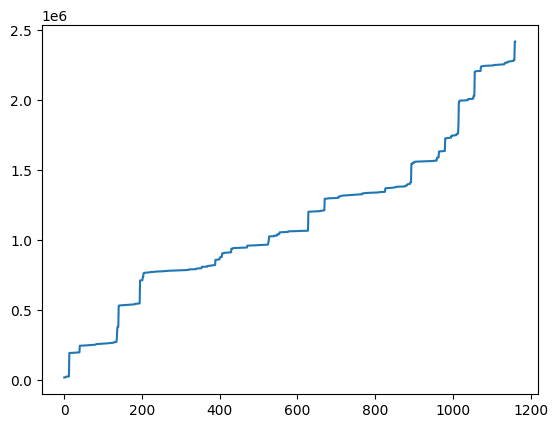

In [31]:
from matplotlib import pyplot as plt

plt.plot(timestamps)

In [54]:
pair = first_pair
pair

(134, 8340)

In [61]:
sources = []
destinations = []
timestamps = []
for source, dest, timestamp in zip(data['sources'], data['destinations'], data['timestamps']):
  if source == pair[0] and dest == pair[1]:
    timestamps.append(timestamp)
    sources.append(source)
    destinations.append(source)

# sources = np.array(sources)
# destinations = np.array(destinations)
# timestamps = np.array(timestamps)

In [65]:
str(sources)

'[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134

In [64]:
str(timestamps)

'[16732.0, 16919.0, 17086.0, 17136.0, 20869.0, 22345.0, 22373.0, 22993.0, 23510.0, 23538.0, 23568.0, 23625.0, 23644.0, 191708.0, 191904.0, 191993.0, 192205.0, 192299.0, 192363.0, 192428.0, 192732.0, 192912.0, 193027.0, 193584.0, 193644.0, 193690.0, 193763.0, 193841.0, 193923.0, 194008.0, 194096.0, 195093.0, 195137.0, 195424.0, 195482.0, 195601.0, 195739.0, 195873.0, 196027.0, 196183.0, 243590.0, 243661.0, 243940.0, 243983.0, 244320.0, 244703.0, 244752.0, 244811.0, 244846.0, 244911.0, 245093.0, 245184.0, 245461.0, 245541.0, 245599.0, 245859.0, 245945.0, 246087.0, 246444.0, 246611.0, 246763.0, 246955.0, 247057.0, 247505.0, 247554.0, 247583.0, 247761.0, 248026.0, 248167.0, 248727.0, 249120.0, 249710.0, 249786.0, 249885.0, 250156.0, 250184.0, 250236.0, 250310.0, 250471.0, 250521.0, 251940.0, 252627.0, 255337.0, 255385.0, 255559.0, 255983.0, 256538.0, 256602.0, 256710.0, 256788.0, 257288.0, 257475.0, 257641.0, 257734.0, 257781.0, 257944.0, 258058.0, 258284.0, 258438.0, 258723.0, 258894.0, 2

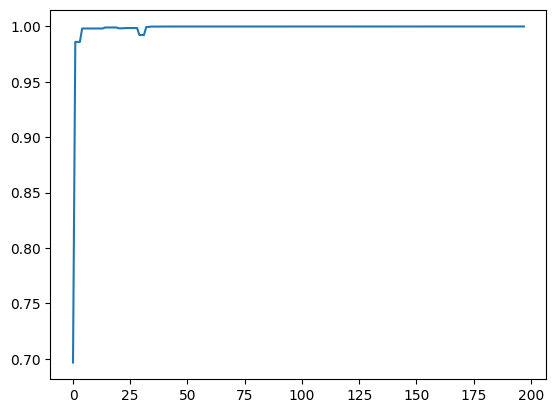

In [211]:
plt.plot([0.6966916918754578, 0.9860804677009583, 0.9860804677009583, 0.9860804677009583, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9983527660369873, 0.9983527660369873, 0.9983527660369873, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9923239946365356, 0.9923239946365356, 0.9923239946365356, 0.9995571970939636, 0.9995571970939636, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9999629259109497, 0.9999629259109497, 0.9999803304672241, 0.9999803304672241, 0.9999803304672241, 0.9999803304672241, 0.999964714050293, 0.999964714050293, 0.999964714050293, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999936819076538, 0.9999936819076538, 0.9999936819076538, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999957084655762, 0.9999957084655762, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999984502792358, 0.9999984502792358, 0.9999984502792358, 0.9999947547912598, 0.9999979734420776, 0.9999979734420776, 0.9999974966049194, 0.9999974966049194, 0.9999986886978149, 0.9999986886978149, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999991655349731, 0.9999991655349731, 0.9999998807907104, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.999998927116394, 0.999998927116394, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999997615814209, 0.9999997615814209])

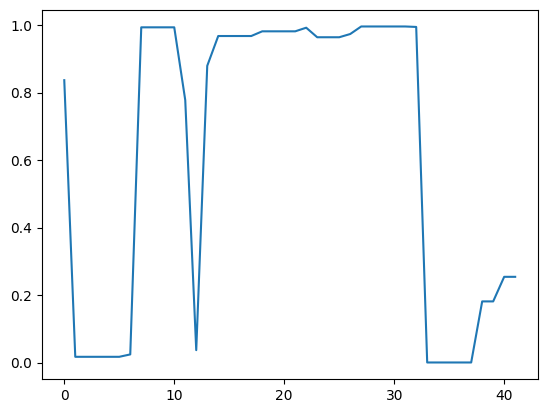

In [214]:
plt.plot([0.836663544178009, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.024223605170845985, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.7777556777000427, 0.03685849532485008, 0.8792458176612854, 0.9675284624099731, 0.9675284624099731, 0.9675284624099731, 0.9675284624099731, 0.981442391872406, 0.981442391872406, 0.981442391872406, 0.981442391872406, 0.9921514987945557, 0.9638796448707581, 0.9638796448707581, 0.9638796448707581, 0.9734542965888977, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.994429886341095, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.18128497898578644, 0.18128497898578644, 0.254107266664505, 0.254107266664505])

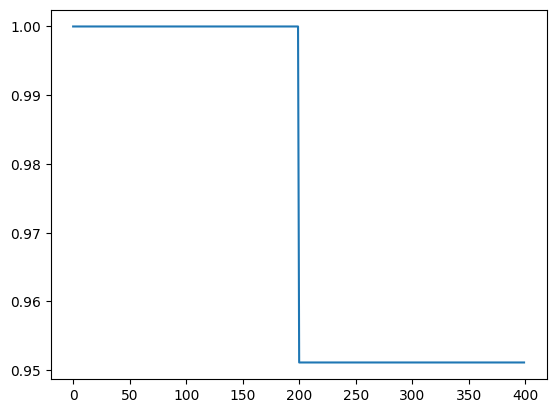

In [36]:
from matplotlib import pyplot as plt
plt.plot([0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081, 0.9511193037033081])

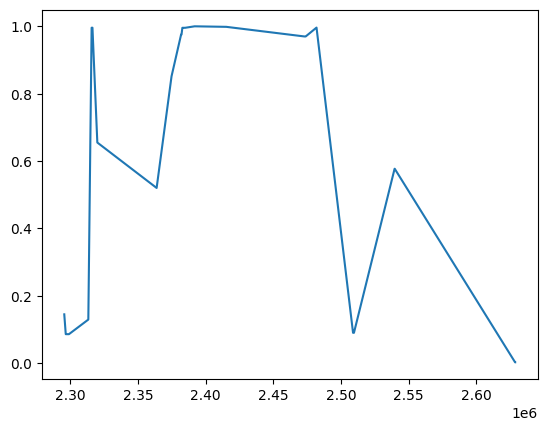

In [69]:
timestamps = [2218300, 2227501, 2236702, 2245903, 2255104, 2264305, 2273506, 2282707, 2291908, 2295420, 2296518, 2296596, 2297108, 2297348, 2298882, 2301109, 2310310, 2313196, 2315634, 2315967, 2316195, 2316250, 2319511, 2319848, 2328712, 2337913, 2347114, 2356315, 2363665, 2365516, 2374684, 2374717, 2381739, 2381844, 2381979, 2382051, 2382681, 2382843, 2382906, 2383918, 2384701, 2391766, 2393119, 2402320, 2411521, 2414350, 2414889, 2415038, 2420722, 2429923, 2439124, 2448325, 2457526, 2466727, 2472848, 2472952, 2473052, 2473178, 2473506, 2473799, 2475928, 2481811, 2485129, 2494330, 2503531, 2508797, 2509084, 2509168, 2509314, 2509471, 2512732, 2521933, 2531134, 2539495, 2539603, 2540335, 2549536, 2558737, 2567938, 2577139, 2586340, 2595541, 2604742, 2613943, 2623144, 2628541, 2628595, 2632345, 2641546, 2650747, 2659948, 2669149, 2678350]
preds = [0.9808714985847473, 0.9808714985847473, 0.9808714985847473, 0.24127694964408875, 0.5280994176864624, 9.689043508842587e-06, 0.0013242880813777447, 0.9948284029960632, 0.14512622356414795, 0.14512622356414795, 0.08630691468715668, 0.08630691468715668, 0.08630691468715668, 0.08630691468715668, 0.08630691468715668, 0.20759043097496033, 0.3182441294193268, 0.1296166628599167, 0.9952479004859924, 0.9952479004859924, 0.9952479004859924, 0.9952479004859924, 0.6546730995178223, 0.6546730995178223, 0.4991166591644287, 0.8940587639808655, 0.6189364194869995, 0.18206200003623962, 0.5199682712554932, 0.5199682712554932, 0.8511466979980469, 0.8511466979980469, 0.9748271703720093, 0.9748271703720093, 0.9748271703720093, 0.9748271703720093, 0.9949607849121094, 0.9949607849121094, 0.9949607849121094, 0.9949607849121094, 0.9949607849121094, 0.9993873834609985, 0.9993873834609985, 0.9821098446846008, 0.9983626008033752, 0.9978650212287903, 0.9978650212287903, 0.9978650212287903, 0.9965060949325562, 0.5262374877929688, 0.9653517007827759, 0.9914857745170593, 0.8919767737388611, 0.9719432592391968, 0.9693143367767334, 0.9693143367767334, 0.9693143367767334, 0.9693143367767334, 0.9693143367767334, 0.9693143367767334, 0.9693143367767334, 0.9955950379371643, 0.954698920249939, 0.9243288636207581, 0.0903896912932396, 0.0903896912932396, 0.0903896912932396, 0.0903896912932396, 0.0903896912932396, 0.0903896912932396, 0.8814622163772583, 0.9971107244491577, 0.9984769225120544, 0.5768489241600037, 0.5768489241600037, 0.5768489241600037, 0.12778796255588531, 0.12778796255588531, 0.2596603333950043, 0.41933873295783997, 0.9209663271903992, 0.9951464533805847, 0.34321916103363037, 0.0007943722885102034, 0.0028364004101604223, 0.0028364004101604223, 0.0028364004101604223, 0.6540876030921936, 0.9445704221725464, 0.9260780811309814, 0.8554201126098633, 0.9273248314857483, 0.00033500310382805765]
positive_sample_mask = [False, False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True, False,  True, False, False, False, False,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False, False, False,  True,  True,  True, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,  True,
        False,  True, False, False, False,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False, False, False, False,  True,  True, False, False, False,
        False, False, False]

timestamps = np.array(timestamps)
preds = np.array(preds)
positive_sample_mask = np.array(positive_sample_mask)

display_negative_edges = False

if display_negative_edges:
  plt.plot(timestamps, preds)
  plt.scatter(timestamps, positive_sample_mask, color="orange")
else:
  timestamps = timestamps[positive_sample_mask]
  preds = preds[positive_sample_mask]
  plt.plot(timestamps, preds)


In [70]:
timestamps

array([2295420, 2296518, 2296596, 2297108, 2297348, 2298882, 2313196,
       2315634, 2315967, 2316195, 2316250, 2319848, 2363665, 2374684,
       2381739, 2381844, 2381979, 2382051, 2382681, 2382843, 2382906,
       2384701, 2391766, 2414350, 2414889, 2415038, 2472848, 2472952,
       2473052, 2473178, 2473506, 2473799, 2481811, 2508797, 2509084,
       2509168, 2509314, 2509471, 2539495, 2539603, 2628541, 2628595])

In [71]:
preds

array([0.14512622, 0.08630691, 0.08630691, 0.08630691, 0.08630691,
       0.08630691, 0.12961666, 0.9952479 , 0.9952479 , 0.9952479 ,
       0.9952479 , 0.6546731 , 0.51996827, 0.8511467 , 0.97482717,
       0.97482717, 0.97482717, 0.97482717, 0.99496078, 0.99496078,
       0.99496078, 0.99496078, 0.99938738, 0.99786502, 0.99786502,
       0.99786502, 0.96931434, 0.96931434, 0.96931434, 0.96931434,
       0.96931434, 0.96931434, 0.99559504, 0.09038969, 0.09038969,
       0.09038969, 0.09038969, 0.09038969, 0.57684892, 0.57684892,
       0.0028364 , 0.0028364 ])

In [72]:
np.array(positive_sample_mask).sum(), len(positive_sample_mask)

(42, 93)

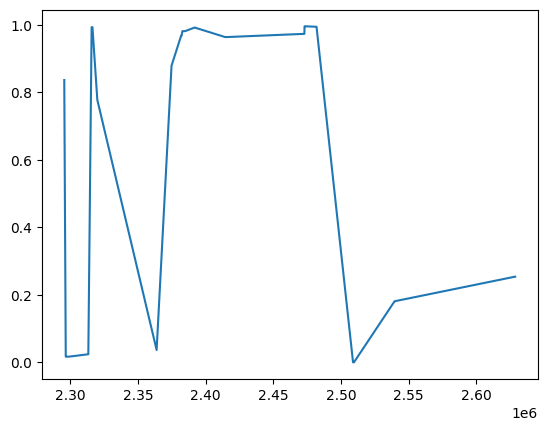

In [74]:
timestamps = np.array([2295420, 2296518, 2296596, 2297108, 2297348, 2298882, 2313196, 2315634, 2315967, 2316195, 2316250, 2319848, 2363665, 2374684, 2381739, 2381844, 2381979, 2382051, 2382681, 2382843, 2382906, 2384701, 2391766, 2414350, 2414889, 2415038, 2472848, 2472952, 2473052, 2473178, 2473506, 2473799, 2481811, 2508797, 2509084, 2509168, 2509314, 2509471, 2539495, 2539603, 2628541, 2628595])
preds = np.array([0.8366639018058777, 0.017139365896582603, 0.017139365896582603, 0.017139365896582603, 0.017139365896582603, 0.017139365896582603, 0.024223553016781807, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.7777567505836487, 0.03685832396149635, 0.8792459964752197, 0.9675283432006836, 0.9675283432006836, 0.9675283432006836, 0.9675283432006836, 0.9814422726631165, 0.9814422726631165, 0.9814422726631165, 0.9814422726631165, 0.9921514987945557, 0.9638797640800476, 0.9638797640800476, 0.9638797640800476, 0.9734542965888977, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.994429886341095, 0.0003385931486263871, 0.0003385931486263871, 0.0003385931486263871, 0.0003385931486263871, 0.0003385931486263871, 0.1812855303287506, 0.1812855303287506, 0.2541064918041229, 0.2541064918041229])

plt.plot(timestamps, preds)